In [116]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

In [117]:
import seaborn as sns
sns.set(font_scale=1.5)

## Пример 1. Различение гипотез о среднем нормальной совокупности.

In [118]:
n = 500
a = 0.2
sigma = 1
alpha = 0.01

norm_rv1 = sps.norm(loc=a, scale=sigma**2)
norm_rv0 = sps.norm(loc=0, scale=sigma**2)
sample1 = norm_rv1.rvs(size=n)
sample0 = norm_rv0.rvs(size=n)

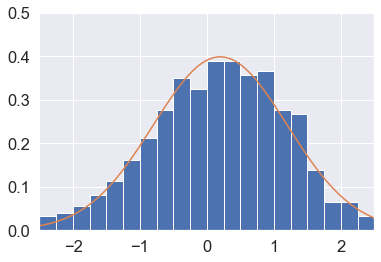

In [119]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample1, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, norm_rv1.pdf(x))

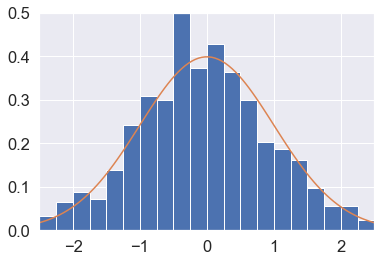

In [120]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample0, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, norm_rv0.pdf(x))

In [121]:
# Находим h2, если верна H0
Q = sps.norm(0, 1).ppf(1-alpha)
h2 = sigma * np.sqrt(n) * Q
print(np.round(h2,2))
if sample1.sum() > h2:
    print('Гипотеза H1 принимается')
else:
    print('Гипотеза H1 отклоняется')

52.02
Гипотеза H1 принимается


In [122]:
print(sample1.sum())
print(sample0.sum())

105.24919178200082
-27.165804935184646


In [123]:
# определим вероятность ошибки второго рода
beta = sps.norm(0,1).cdf(Q - (a/sigma)*np.sqrt(n))
print(np.round(beta, 3))

0.016


## Задача 2

In [203]:
lambA = 0.12
lambB = 0.15

pois_rv_A = sps.poisson(mu=lambA)
pois_rv_B = sps.poisson(mu=lambB)
sample_A = pois_rv_A.rvs(size=2809)
sample_B = pois_rv_B.rvs(size=2809)

print(sample_A.sum(), sample_B.sum())

343 439
